# Business case : Based on the images provided we need to detect which image is of disease of rice leaf

#### Problem Statement
   * To prepare the data analysis on the given data
   * To create a model which can classify the three major attacking diseases of rice plant.
   * To analyze techniques like data augmentation and so on.
## Domain research
   * Rice is one of the most widely consumed crop cultivated around the world.Roughly, one-half of the people around the world depends on Rice for their food consumption.
   * Disease can infect paddy at all growth stages and all aerial parts of plant
   In this project there are three rice leaf diseases listed as below :
   
  ### Brown Spot disease
   Brown spot disease is a seedling disease that can also affect the leaves and panicles of rice. The pathogen is airborne and high humidity and warm temperatures favor its spread.
      
  ### Bacterial Leaf Blight
   Bacterial leaf blight is often first noticed in fields as brown areas about 3 to 4 feet in diameter. Leaf symptoms appear as irregular brown spots, often beginning on the leaf margins. Lesions initially have an irregular yellow halo and may appear watersoaked.
       
  ### Leaf Smut
   Leaf smut is a minor disease of rice caused by the fungus Entyloma oryzae. It's characterized by small, slightly raised, angular, black spots on both sides of the leaves. The spots are linear, rectangular, angular, or elliptical and measure 0.5-2.0. Although rare, it can also produce spots on leaf sheaths. 



In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from os import listdir

In [22]:
epochs=25
init_lr=1e-3
bs=32
default_image_size=tuple((256,256))
image_size=0
width=256
height=256
depth=3

In [85]:
image_file=r"C:\Users\Administrator\Desktop\Datamites project\rice"
#brown_spot=r"C:\Users\Administrator\Desktop\Datamites project\Data\Brown spot"
#leaf_smut=r"C:\Users\Administrator\Desktop\Datamites project\Data\Leaf smut"

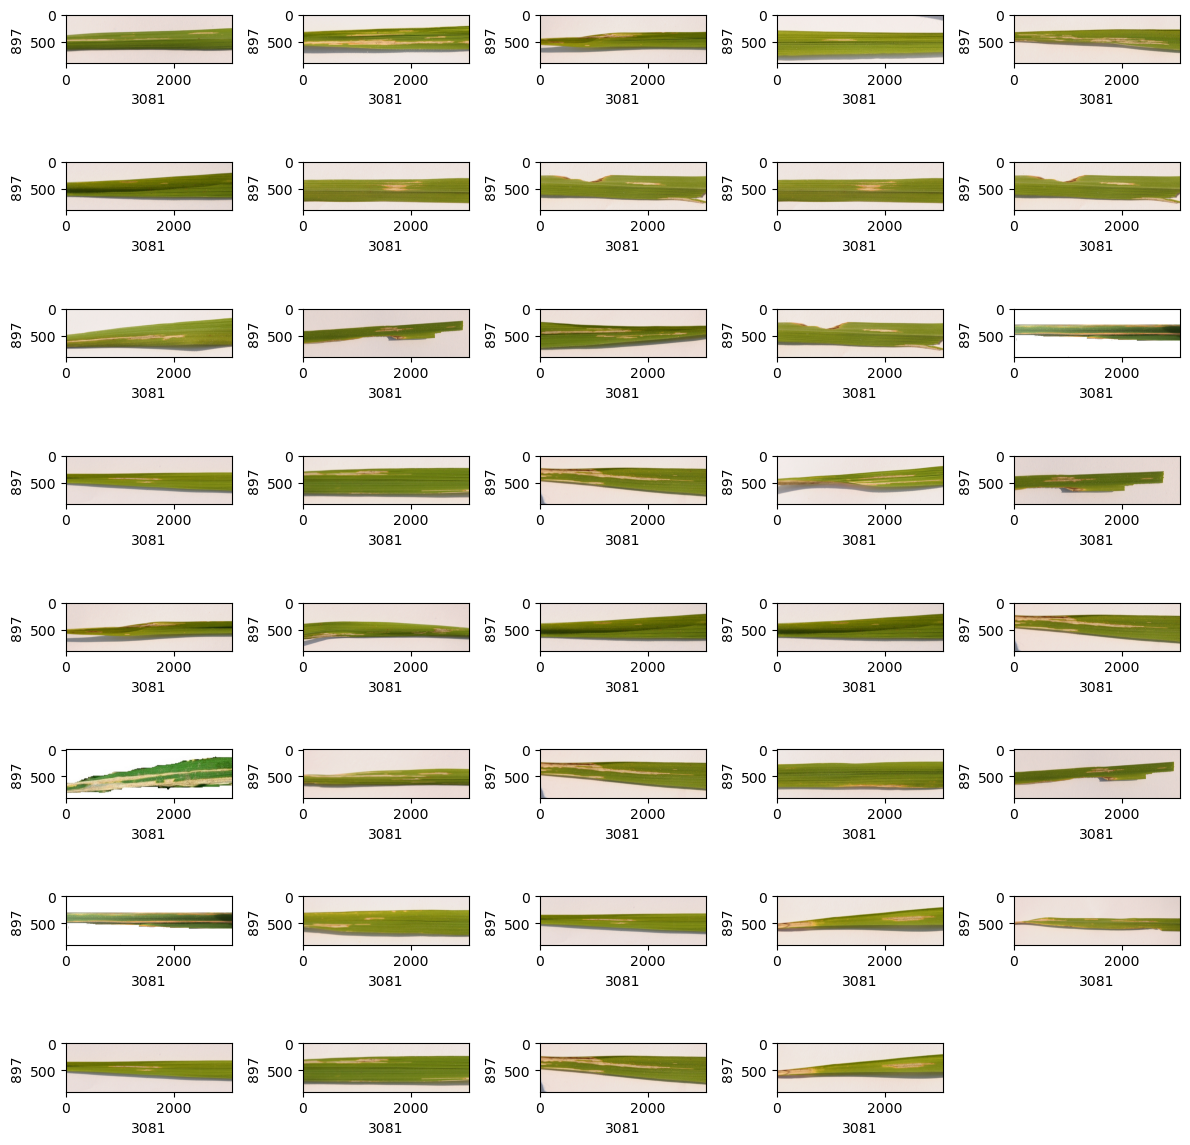

In [87]:
#Bacterial lea blight
plt.figure(figsize = (12, 12))
blb_image = leaf_blight + '/Bacterial leaf blight'
for i in range(1, 40):
    plt.subplot(8, 5, i)
    plt.tight_layout()
    rand_img = plt.imread(blb_image +'/'+ random.choice(sorted(os.listdir(blb_image))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

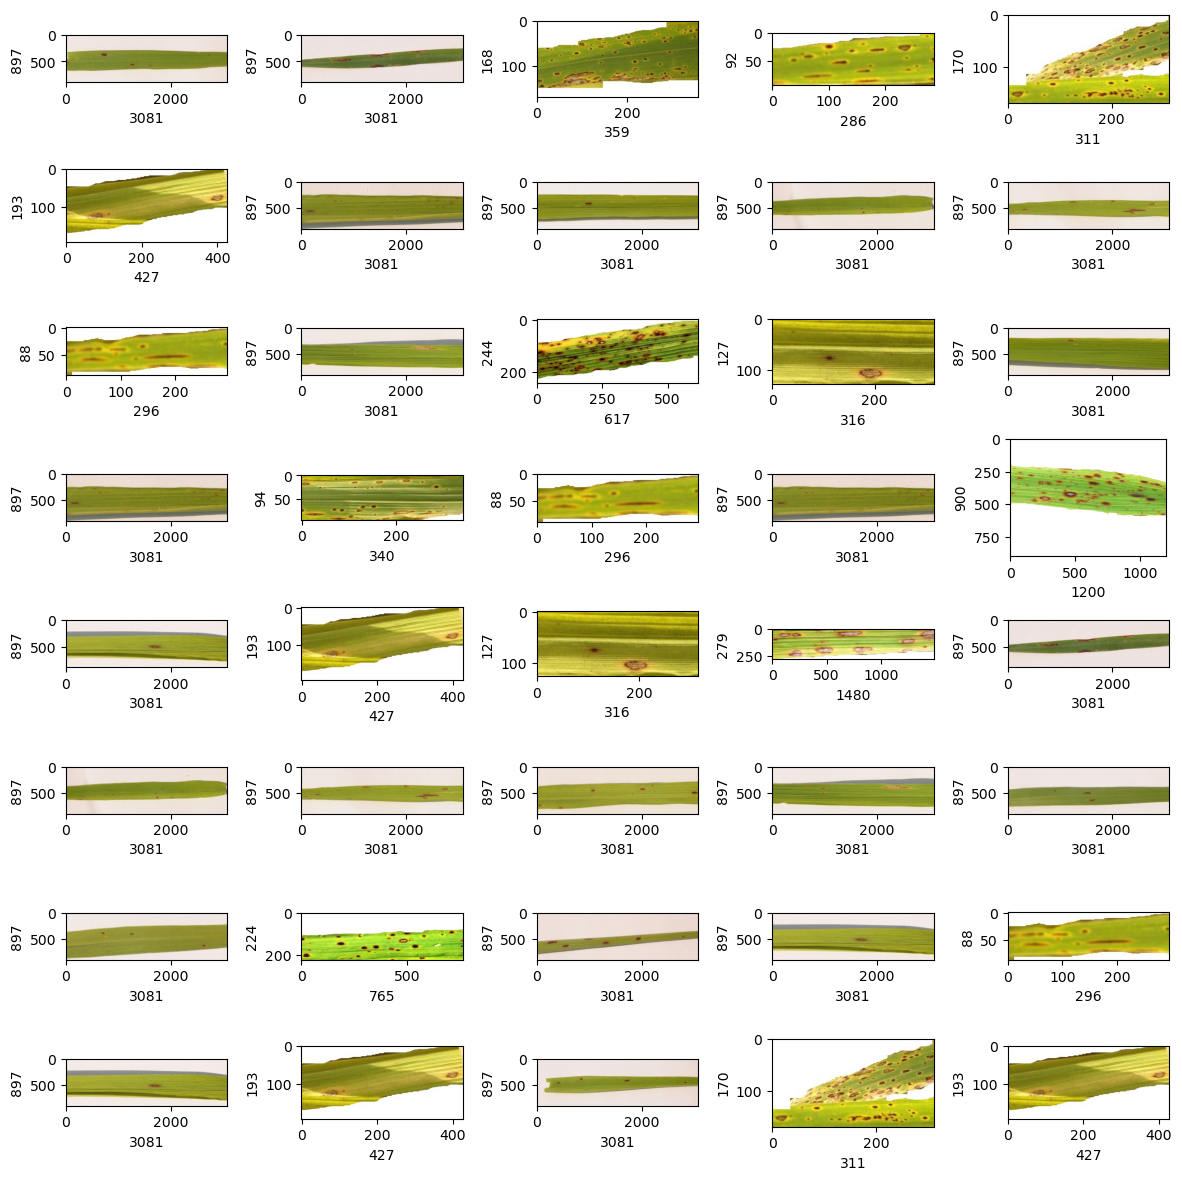

In [88]:
#brown spot
plt.figure(figsize = (12, 12))
bs_image = image_file + '/Brown spot'
for i in range(1, 41):
    plt.subplot(8, 5, i)
    plt.tight_layout()
    rand_img = plt.imread(bs_image +'/'+ random.choice(sorted(os.listdir(bs_image))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

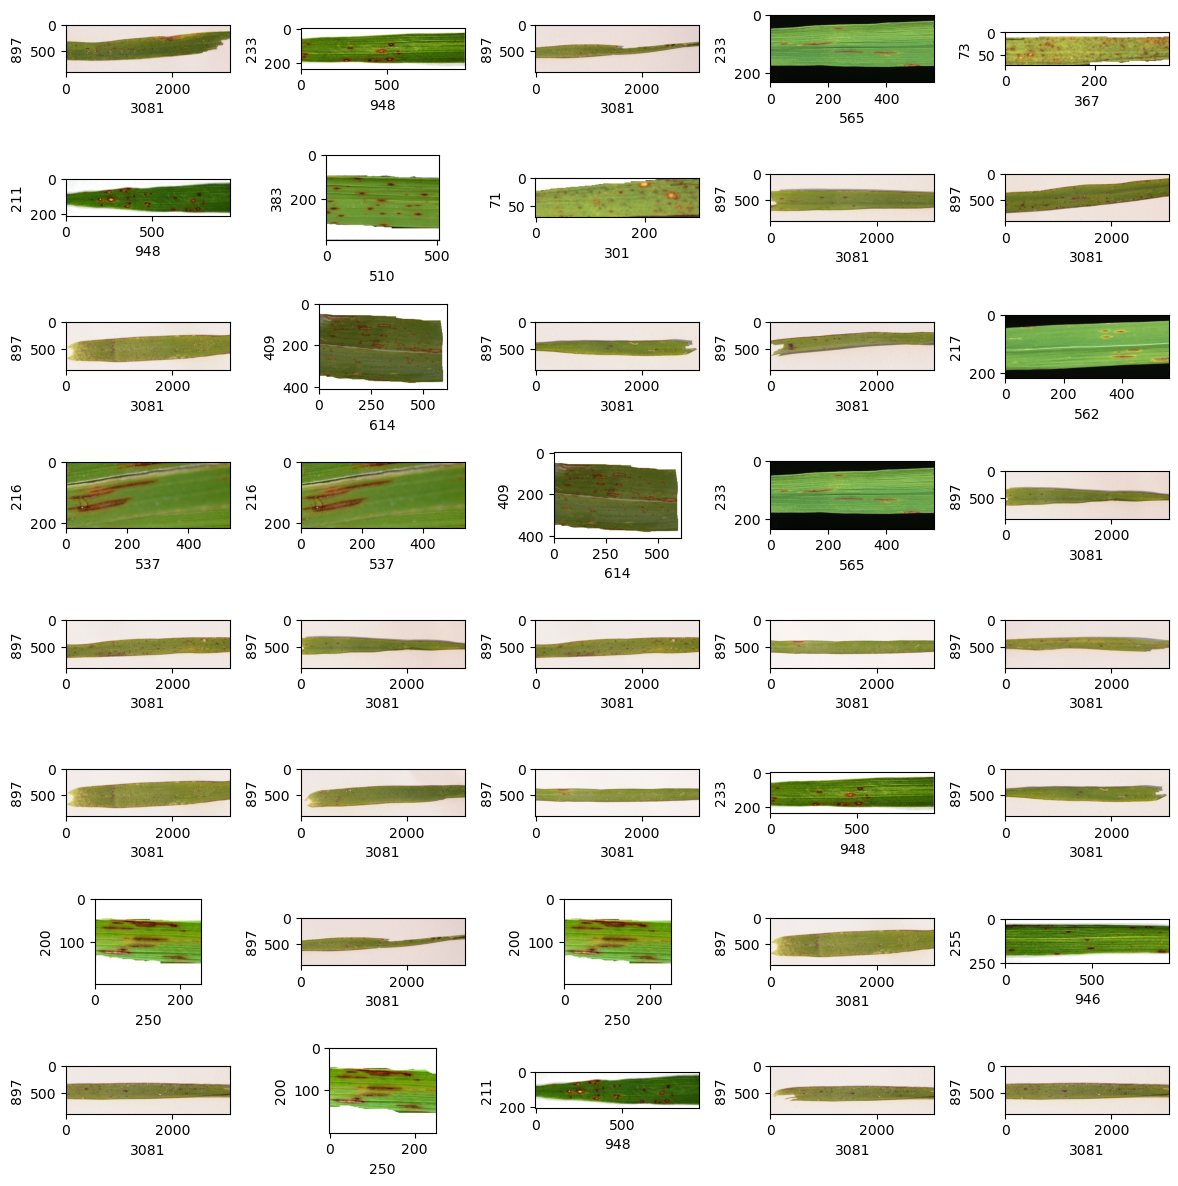

In [89]:
#leaf smut
plt.figure(figsize = (12, 12))
ls_image = image_file + '/Leaf Smut'
for i in range(1, 41):
    plt.subplot(8, 5, i)
    plt.tight_layout()
    rand_img = plt.imread(ls_image +'/'+ random.choice(sorted(os.listdir(ls_image))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

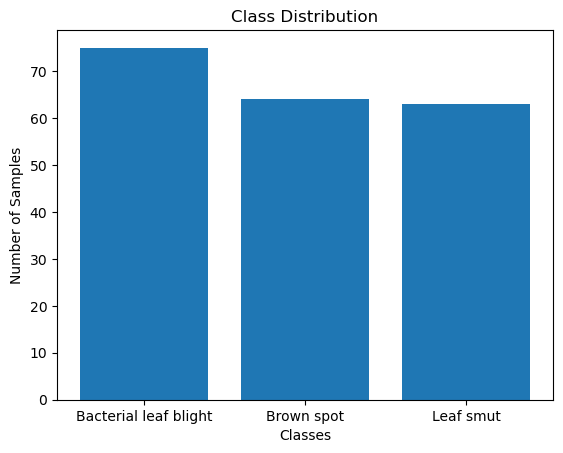

In [91]:
# Plotting a graph to see the number of images in each class

class_counts = {class_name: len(images) for class_name, images in {
'Bacterial leaf blight': blb_image,
'Brown spot': bs_image,
'Leaf smut': ls_image
}.items()}
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [92]:
input_shape_2D = (224, 224)
input_shape_3D = (224, 224, 3)
seed = 1
batch_size = 32
epochs = 30
stopper = EarlyStopping(patience = 5)

NameError: name 'EarlyStopping' is not defined

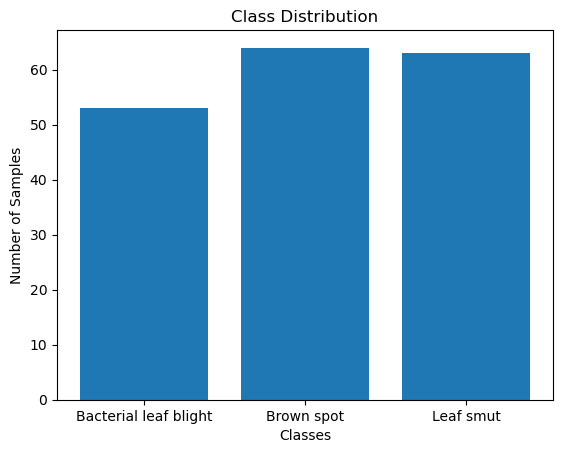

In [90]:
class_counts = {class_name: len(images) for class_name, images in {
 'Bacterial leaf blight': leaf_blight,
 'Brown spot': brown_spot,
 'Leaf smut': leaf_smut
}.items()}
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

In [75]:
# Initializing the CNN model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(700, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


In [77]:
model.layers

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 32, 32, 64)       